# Importando Bibliotecas


In [71]:
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importando DataBase

In [72]:
base_SIN492 = pd.read_csv("dataset_SIN492.parquet.csv")
base_SIN492.head(10)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850000,0.009198,94.611429,7,0
1,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000000,0.000000,0.000000,0,1
2,50.0,23,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525000,0.095238,86.520000,4,0
3,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000000,0.000000,0.000000,0,1
4,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500000,0.004367,87.560000,1,0
5,850.0,9,1435.68,1.60,-848.40,0.589167,1440,0.003879,1.692221,371185,2745.78,0.522868,40.400000,0.014583,68.365714,21,1
6,50.0,1,436.85,6.80,-82.15,0.238116,345,0.018375,5.317712,18776,959.57,0.455256,20.537500,0.011594,109.212500,4,1
7,0.0,0,0.00,-6.50,-16.80,0.150000,112,0.017231,0.000000,6500,6692.13,0.000000,0.000000,0.000000,0.000000,0,0
8,100.0,11,1027.86,79.76,-110.56,0.362500,288,0.015098,9.845402,19075,3611.20,0.284631,8.030769,0.045139,79.066154,13,0
9,600.0,21,2876.01,3.68,-596.32,0.265251,2247,0.004584,4.825358,490191,2324.27,1.237382,31.369474,0.008456,151.368947,19,1


# Características do Conjunto de Dados

In [73]:
entradas = base_SIN492.iloc[:, :15].values
saidas = base_SIN492.iloc[:, 16].values

In [74]:
entradas.shape
#saidas.shape

(466, 15)

# Normalizar os Dados

In [75]:
normalizador = MinMaxScaler(feature_range=(0,1))
entradas = normalizador.fit_transform(entradas)

In [76]:
saidas

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,

# Divisão do Conjunto de Dados - 20% Teste e 80% Treinamento

In [77]:
entradasTrain, entradasTest, valoresSaidaTrain, valoresSaidaTest = train_test_split(entradas, saidas, test_size=0.2, random_state=42)

In [78]:
print("Quantidade de Dados de Treino:" ,len(entradasTrain))
print("Quantidade de Dados de Teste:" ,len(entradasTest))

print("Quantidade de Dados de Treino e dos atributos:" ,entradasTrain.shape)
print("Quantidade de Dados de Teste e dos atributos" ,entradasTest.shape)

print("Quantidade de Saidas de Treino e coluna:" ,valoresSaidaTrain.shape)
print("Quantidade de Saidas de Teste e coluna:" ,valoresSaidaTest.shape)

print("min: ", valoresSaidaTrain.min())
print("max: ", valoresSaidaTrain.max())

Quantidade de Dados de Treino: 372
Quantidade de Dados de Teste: 94
Quantidade de Dados de Treino e dos atributos: (372, 15)
Quantidade de Dados de Teste e dos atributos (94, 15)
Quantidade de Saidas de Treino e coluna: (372,)
Quantidade de Saidas de Teste e coluna: (94,)
min:  0
max:  1


# Salvar os pesos do modelo periodicamnte durante o treinamento

In [79]:
import os
import keras as k

# Novo checkpoint h5 -----------------------------------------
checkpoint_path = "./SIN492-{epoch:04d}.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Novo cp_callback h5 -------------------------------------------
cp_callback = k.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True
)


# Importando Bibliotecas

In [80]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
import keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization

# Definir Modelo de Rede Neural - MLP

In [81]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(15,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo

In [84]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo

In [85]:
history = model.fit(entradasTrain, valoresSaidaTrain, epochs=500, batch_size=128,  callbacks=[cp_callback],validation_data=(entradasTest, valoresSaidaTest))

Epoch 1/500
1/3 [=========>....................] - ETA: 8s - loss: 0.9532 - accuracy: 0.5625
Epoch 1: val_accuracy improved from -inf to 0.47872, saving model to .\SIN492-0001.hdf5


C:\Users\maste\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 6s 788ms/step - loss: 0.8732 - accuracy: 0.5591 - val_loss: 0.6854 - val_accuracy: 0.4787
Epoch 2/500
1/3 [=========>....................] - ETA: 0s - loss: 0.8295 - accuracy: 0.5312
Epoch 2: val_accuracy improved from 0.47872 to 0.48936, saving model to .\SIN492-0002.hdf5
3/3 [==============================] - 0s 127ms/step - loss: 0.8291 - accuracy: 0.5457 - val_loss: 0.6839 - val_accuracy: 0.4894
Epoch 3/500
1/3 [=========>....................] - ETA: 0s - loss: 0.7472 - accuracy: 0.5938
Epoch 3: val_accuracy improved from 0.48936 to 0.55319, saving model to .\SIN492-0003.hdf5
3/3 [==============================] - 0s 108ms/step - loss: 0.8207 - accuracy: 0.5726 - val_loss: 0.6827 - val_accuracy: 0.5532
Epoch 4/500
1/3 [=========>....................] - ETA: 0s - loss: 0.7675 - accuracy: 0.5391
Epoch 4: val_accuracy improved from 0.55319 to 0.65957, saving model to .\SIN492-0004.hdf5
3/3 [==============================] - 0s 107ms/step - loss: 

# Salvar o modelo inteiro com SavedModel

In [86]:
model_name = 'patch_model_sin492'
save_dir = save_dir = 'C:\\Users\\maste\\Videos\\Modelo-MLP'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


INFO:tensorflow:Assets written to: C:\Users\maste\Videos\Modelo-MLP\patch_model_sin492\assets


INFO:tensorflow:Assets written to: C:\Users\maste\Videos\Modelo-MLP\patch_model_sin492\assets


Saved trained model at C:\Users\maste\Videos\Modelo-MLP\patch_model_sin492 


# Leitura do modelo

In [89]:
import tensorflow as tf
from keras.models import load_model
# Carregar modelo de arquivo
# Carregar modelo de arquivo
model = tf.keras.models.load_model("C:\\Users\\maste\\Videos\\Modelo-MLP\\patch_model_sin492")

In [91]:
# Carregar os pesos do modelo
model.load_weights("C:\\Users\\maste\\Videos\\Modelo-MLP\\SIN492-0500.hdf5")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                512       
                                                                 
 batch_normalization_4 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 673 (2.63 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 64 (256.00 Byte)
_________________________________________________________________


# Leitura CPKPT

In [92]:
print("---train")
loss, acc = model.evaluate( entradasTrain,valoresSaidaTrain, verbose=2)
print(loss)
print(acc)
print("Restored model teste, accuracy: {:5.2f}%".format(100*acc))

print("---teste")
loss, acc = model.evaluate( entradasTest,valoresSaidaTest, verbose=2)
print(loss)
print(acc)
print("Restored model teste, accuracy: {:5.2f}%".format(100*acc))

---train
12/12 - 1s - loss: 0.5733 - accuracy: 0.7124 - 629ms/epoch - 52ms/step
0.5733437538146973
0.7123655676841736
Restored model teste, accuracy: 71.24%
---teste
3/3 - 0s - loss: 0.5947 - accuracy: 0.7234 - 49ms/epoch - 16ms/step
0.594719648361206
0.7234042286872864
Restored model teste, accuracy: 72.34%


# Gráfico da Acurácia por épocas

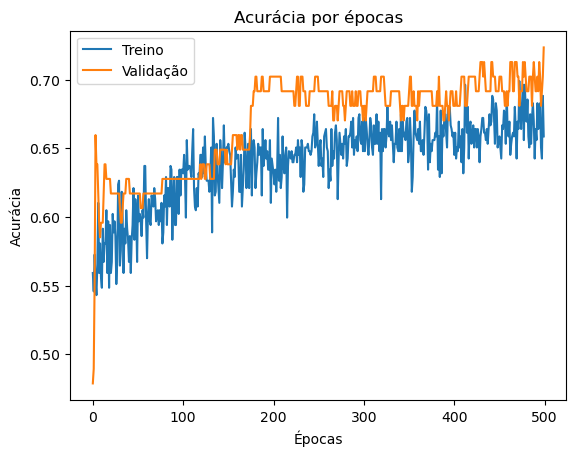

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])
plt.show()

# Gráfico Loss por épocas

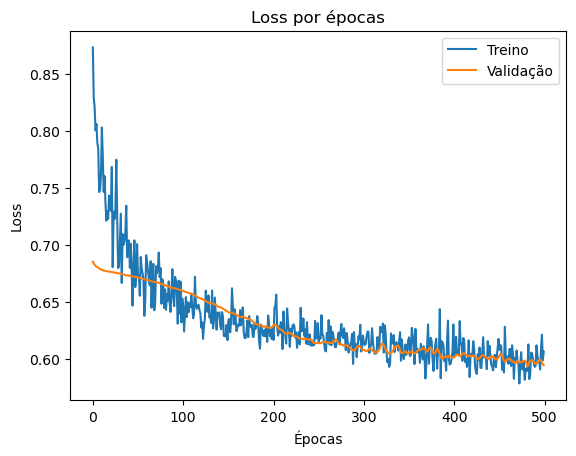

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss por épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])